# **NEUROPREDICT 🧠**
Integrantes/Desarrolladores:

*   Emanuel Diaz Palacio
*   Santiago Santamaria Méndez



---
Dataset original: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

# Contenido del dataset:
El dataset original contiene multiples datos como:


*   Patient ID

*   Demographic Details

*   Lifestyle Factors

*  Medical History
*   Clinical Measurements

*   Cognitive and Functional Assessments

*   Symptoms
*  Diagnosis Information

*  Confidential Information

# NOTA:
No todos los datos resultaban ser relevantes para el entrenamiento del modelo, asi que por eso se utilizaron algunos metodos para evaluar cuales eran los features con mayor incidencia y correlacion para con el target objetivo.

Si deseas ver a detalle el proceso que se le aplico al dataset original puedes vistar este enlace: https://colab.research.google.com/drive/1unRH_vb4mimkvh2Y0pfaytvHZW6zuKH9#scrollTo=fVyV_L0N8vxz

Encontraras:

* Carga del dataset

* Separación de numéricas/categóricas

* Análisis de correlación

* Ranking de importancia (Ramdom forest)

* RFE para seleccionar ~15 features

* Pipeline con SMOTETomek

* Entrenamiento y evaluación (Recall, F1, AUC‑PR, matriz de confusión)

* Ajuste de umbral para maximizar Recall clínico


#En este notebook, los feauteres utilizados seran 16 los cuales son:
* EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher

* Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
* FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

* CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.

* Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
* HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.
* Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

* MMSE:Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.

* FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.

* MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.

* BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.

* ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

* Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.
* Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.

* DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.




# **Objetive:**


*   Desarrollar un modelo de aprendizaje automatico (Machine learning) que ayude a predecir el padecimiento del Alzheimer en las personas, usando datos clinicos y demograficos tabulares.


# **Nota aclaratoria:**
* Nuestro modelo no pretende reemplazar a un doctor, ni a los diagnosticos que estos pueden hacer para predecir el Alzheimer.
* Nuestro modelo pretende sevir como una ayuda para las personas sin llegar a ser un reemplazo a la medicina.
#Tipo de problema: clasificacion binaria.




# **Let's get started** ⭐

# **Pipeline del algoritmo**

# 1. Recoleccion de datos/análisis de datos
1.1. Importacion de libreria a utilizar y leer datset

In [1]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#Models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#Leer data
Data= pd.read_csv('Data/dataset_reduced.csv')

# 2. EDA (análisis exploratorio de datos)

Aquí queremos comprender los datos que tenemos, su estructura, si hay datos atipicos, nulos o repetidos, el objetivo es analizar la calidad del dataset y el tiepo de datos que tenemos.

In [3]:
# Observamos los primeros 5 y últimos 5 datos del dataset
Data

,EducationLevel,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Depression,HeadInjury,Hypertension,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,DifficultyCompletingTasks,Diagnosis
0,2,0,0,0,1,0,0,21.463532,6.518877,0,0,1.725883,0,0,1,0
1,0,0,0,0,0,0,0,20.613267,7.118696,0,0,2.592424,0,0,0,0
2,1,0,1,0,0,0,0,7.356249,5.895077,0,0,7.119548,0,1,1,0
3,1,1,0,0,0,0,0,13.991127,8.965106,0,1,6.481226,0,0,0,0
4,0,0,0,0,0,0,0,13.517609,6.045039,0,0,0.014691,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,1,0,0,0,0,0,0,1.201190,0.238667,0,0,4.492838,1,0,0,1
2145,2,0,0,0,0,0,0,6.458060,8.687480,0,1,9.204952,0,0,0,1
2146,1,0,0,0,0,0,0,17.011003,1.972137,0,0,5.036334,0,0,0,1
2147,1,0,0,1,0,0,0,4.030491,5.173891,0,0,3.785399,0,0,0,1


In [4]:
# conocer y observar la informacion
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EducationLevel             2149 non-null   int64  
 1   Smoking                    2149 non-null   int64  
 2   FamilyHistoryAlzheimers    2149 non-null   int64  
 3   CardiovascularDisease      2149 non-null   int64  
 4   Depression                 2149 non-null   int64  
 5   HeadInjury                 2149 non-null   int64  
 6   Hypertension               2149 non-null   int64  
 7   MMSE                       2149 non-null   float64
 8   FunctionalAssessment       2149 non-null   float64
 9   MemoryComplaints           2149 non-null   int64  
 10  BehavioralProblems         2149 non-null   int64  
 11  ADL                        2149 non-null   float64
 12  Confusion                  2149 non-null   int64  
 13  Disorientation             2149 non-null   int64

* No hay variables objet

In [5]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
FamilyHistoryAlzheimers,2149.0,0.252210,0.434382,0.000000,0.000000,0.000000,1.000000,1.000000
CardiovascularDisease,2149.0,0.144253,0.351428,0.000000,0.000000,0.000000,0.000000,1.000000
Depression,2149.0,0.200558,0.400511,0.000000,0.000000,0.000000,0.000000,1.000000
HeadInjury,2149.0,0.092601,0.289940,0.000000,0.000000,0.000000,0.000000,1.000000
Hypertension,2149.0,0.148906,0.356079,0.000000,0.000000,0.000000,0.000000,1.000000
MMSE,2149.0,14.755132,8.613151,0.005312,7.167602,14.441660,22.161028,29.991381
FunctionalAssessment,2149.0,5.080055,2.892743,0.000460,2.566281,5.094439,7.546981,9.996467
MemoryComplaints,2149.0,0.208004,0.405974,0.000000,0.000000,0.000000,0.000000,1.000000


In [6]:
# ver si se tienen datos nulos y repetidos.
Data.isnull().sum()


,0
EducationLevel,0
Smoking,0
FamilyHistoryAlzheimers,0
CardiovascularDisease,0
Depression,0
HeadInjury,0
Hypertension,0
MMSE,0
FunctionalAssessment,0
MemoryComplaints,0


* No hay datos nulos.

In [7]:
# Datos duplicados.
Data.duplicated().sum()

np.int64(0)

* No hay datos duplicados.

In [8]:
# Observamos la cantidad de features e instancias que hay en nuestro dataset.
Data.shape

(2149, 16)

* Hay 2149 instancias.
* Hay 16 features.

# Balance de los datos 📊

In [9]:
# Queremos ver el balance de los datos.
print('Distribución de la variable objetivo (Diagnosis):')
print(Data['Diagnosis'].value_counts())
print('\nPorcentaje de cada clase:')
print(Data['Diagnosis'].value_counts(normalize=True) * 100)

Distribución de la variable objetivo (Diagnosis):
Diagnosis
0    1389
1     760
Name: count, dtype: int64

Porcentaje de cada clase:
Diagnosis
0    64.634714
1    35.365286
Name: proportion, dtype: float64


# Visualizacion del desbalance

/tmp/ipython-input-2860923415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=Data, palette='viridis')


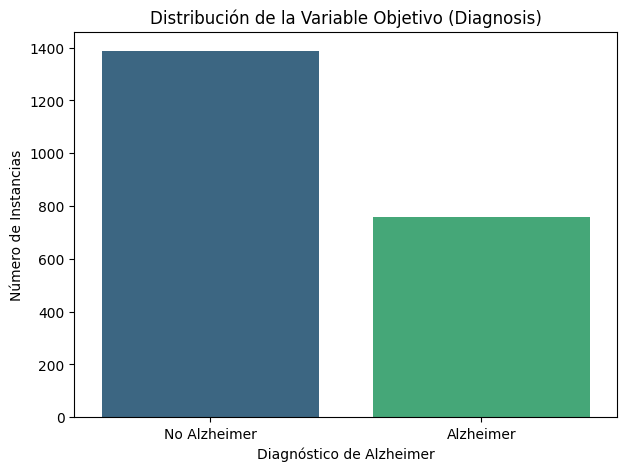

In [10]:
# Visualizamos el desbalance en un diagrama de barras.
plt.figure(figsize=(7, 5))
sns.countplot(x='Diagnosis', data=Data, palette='viridis')
plt.title('Distribución de la Variable Objetivo (Diagnosis)')
plt.xlabel('Diagnóstico de Alzheimer')
plt.ylabel('Número de Instancias')
plt.xticks(ticks=[0, 1], labels=['No Alzheimer', 'Alzheimer'])
plt.show()

**Observaciones:**
* Se observa que hay más datos para 0 (no va a sufrir Alzheimer) que para 1 (va a padecer Alzheimer).
* Esto representa un problema ya que nuestro target objetivo es predecir si alguien **SÍ** va a padecer de Alzheimer.
* Aunque el desbalance no es tan severo, es mejor tratarlo para que el modelo no haga precisiones incorrectas en un futuro.

# Solucion del desbalance


In [11]:
# Importar SMOTETomek
from imblearn.combine import SMOTETomek

# Separar las características (X) y la variable objetivo (y)
X = Data.drop('Diagnosis', axis=1)
y = Data['Diagnosis']

# Inicializar SMOTETomek
smotetomek = SMOTETomek(random_state=42)

# Aplicar SMOTETomek a los datos
X_resampled, y_resampled = smotetomek.fit_resample(X, y)

# Mostrar la nueva distribución de la variable objetivo
print('Nueva distribución de la variable objetivo (Diagnosis) después de SMOTETomek:')
print(y_resampled.value_counts())
print('\nPorcentaje de cada clase después de SMOTETomek:')
print(y_resampled.value_counts(normalize=True) * 100)

Nueva distribución de la variable objetivo (Diagnosis) después de SMOTETomek:
Diagnosis
0    1354
1    1354
Name: count, dtype: int64

Porcentaje de cada clase después de SMOTETomek:
Diagnosis
0    50.0
1    50.0
Name: proportion, dtype: float64


# Gráfica balanceada ✔

/tmp/ipython-input-1055237853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


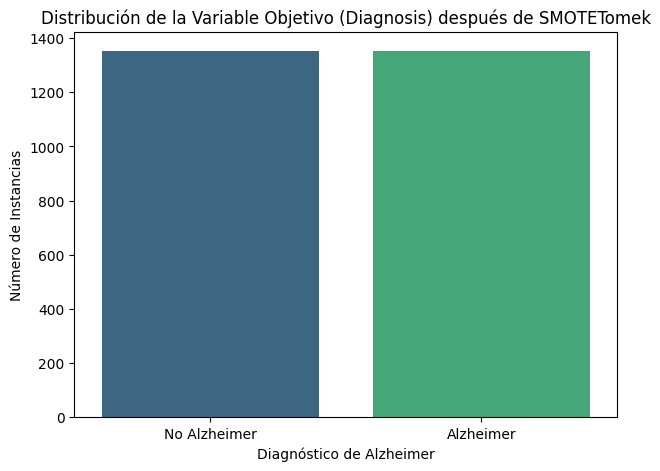

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Distribución de la Variable Objetivo (Diagnosis) después de SMOTETomek')
plt.xlabel('Diagnóstico de Alzheimer')
plt.ylabel('Número de Instancias')
plt.xticks(ticks=[0, 1], labels=['No Alzheimer', 'Alzheimer'])
plt.show()

**Conclusiones:**


*  Como se puede observar la data ya esta balanceada.
*   Para balancear la data se utilizo el algoritmo de SMOTE Tomek link, ya que es el mas efectivo para nuestro caso, permitiendonos generar data suficiente en el dato menor y recortar y limpiar datos inecesarios del mayoritario.




# **¿Por qué SMOTE Tomek link?**
Este algoritmo resulta especialmente útil para nuestro modelo porque en medicina:

* Existen registros confusos, ruido natural, variaciones biológicas, artefactos.

* Tomek Links “limpia” ejemplos que están en la frontera donde clases se mezclan anómalamente.

* Eso hace que el modelo aprenda mejores fronteras y mejore el Recall sin crear ruido.

Especialmente, el hecho de que mejore el Recall nos beneficia demasiado ya que al modelo tratar temas de salud de las personas no podemos permitir que el modelo se comporte de forma erronea, asi que queremos la maxima sensibilidad posible.

# Matríz de correlacion de los datos.

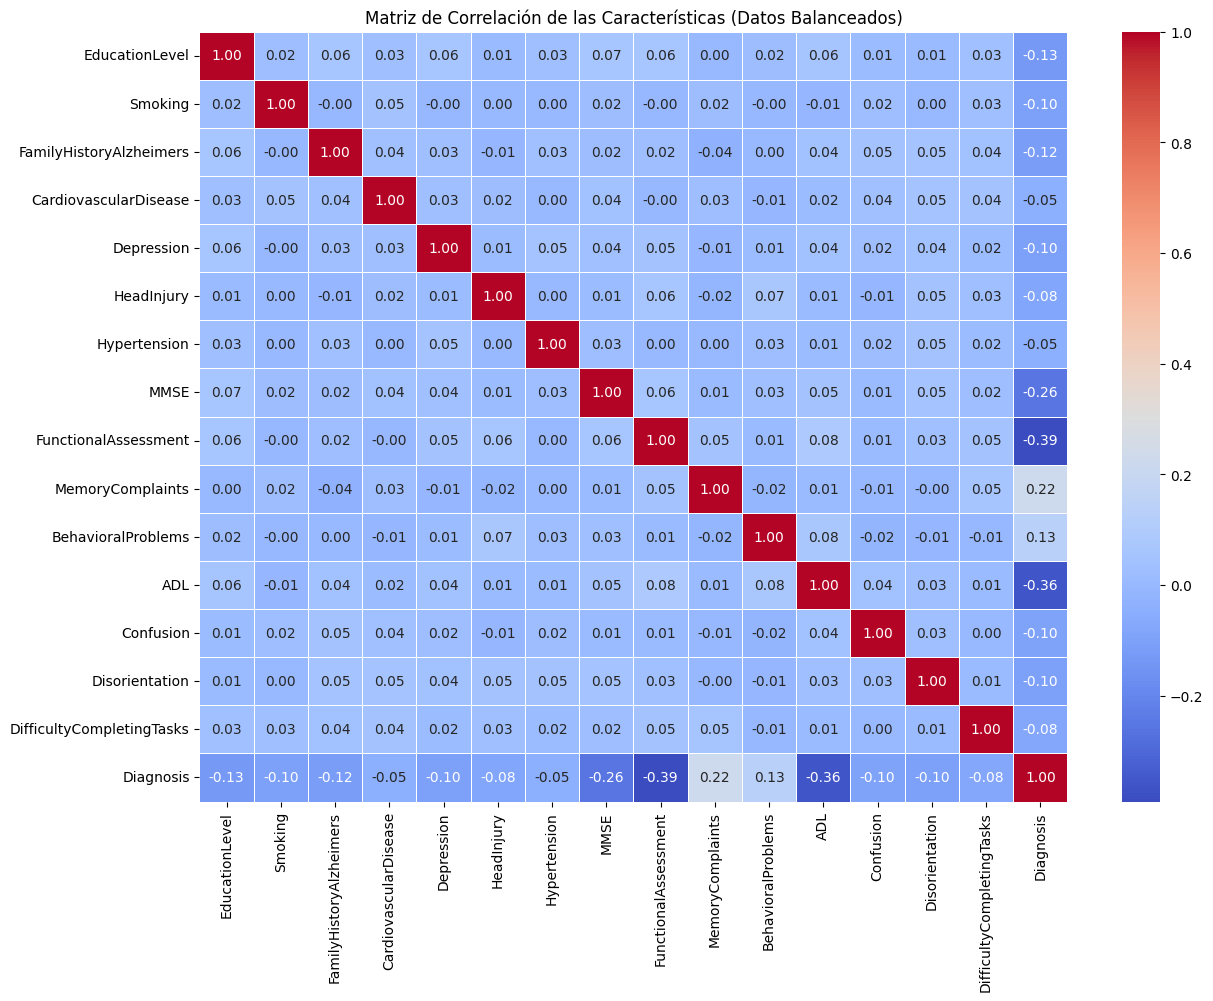


Correlación de las características con la columna objetivo (Diagnosis):
Diagnosis                    1.000000
MemoryComplaints             0.223830
BehavioralProblems           0.133964
Hypertension                -0.046808
CardiovascularDisease       -0.047536
DifficultyCompletingTasks   -0.076682
HeadInjury                  -0.084779
Confusion                   -0.096287
Depression                  -0.103357
Smoking                     -0.103601
Disorientation              -0.104913
FamilyHistoryAlzheimers     -0.116293
EducationLevel              -0.133578
MMSE                        -0.259337
ADL                         -0.359067
FunctionalAssessment        -0.391414
Name: Diagnosis, dtype: float64


In [12]:
# Combinar las características resampleadas y la variable objetivo para la matriz de correlación
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Calcular la matriz de correlación
correlation_matrix = data_resampled.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación de las Características (Datos Balanceados)')
plt.show()

# Analizar la correlación de las características con respecto a la columna objetivo 'Diagnosis'
correlation_with_target = correlation_matrix['Diagnosis'].sort_values(ascending=False)
print('\nCorrelación de las características con la columna objetivo (Diagnosis):')
print(correlation_with_target)

**Conclusiones/Interpretacion**

* Algo que llama rápidamente la atencion cuando análisamos la correlacion de los datos es que la mayoría de los mismos tinen una correlacion baja negativa, lo cual no quiere decir que este mal y el hecho de que muchas sean tan bajas es esperbale ya que en medicina las variables normalmmente evaluan mutiples causas que generan los problemas, sin embargo el Alzheimer es una enfermedad multicausada lo que quiere decir que no hay algo en particular que permita saber que causa el Alzheimer siendo esa la razon del porque los features tienen correlaciones negativas y bajas.

* Es muy interesante ver como la variable EducationLevel se relaciona con el Target objetivo de manera inversa. Aunque la correlación es baja, el efecto está presente y es un patrón común en neurociencia cognitiva. El nivel educativo no evita la enfermedad, pero ayuda a compensar o retrasar la manifestación clínica.

* Las variables funcionales (FunctionalAssessment y ADL) presentan las correlaciones más altas con el diagnóstico. Esto es clínicamente consistente, ya que la pérdida de autonomía y la disminución en las actividades de la vida diaria son indicadores tempranos del deterioro cognitivo asociado al Alzheimer. Es importante aclarar que esta correlación no implica causalidad: no significa que realizar actividades prevenga la enfermedad, sino que su deterioro es parte del cuadro clínico.



# Análisis visual de la data. ✨

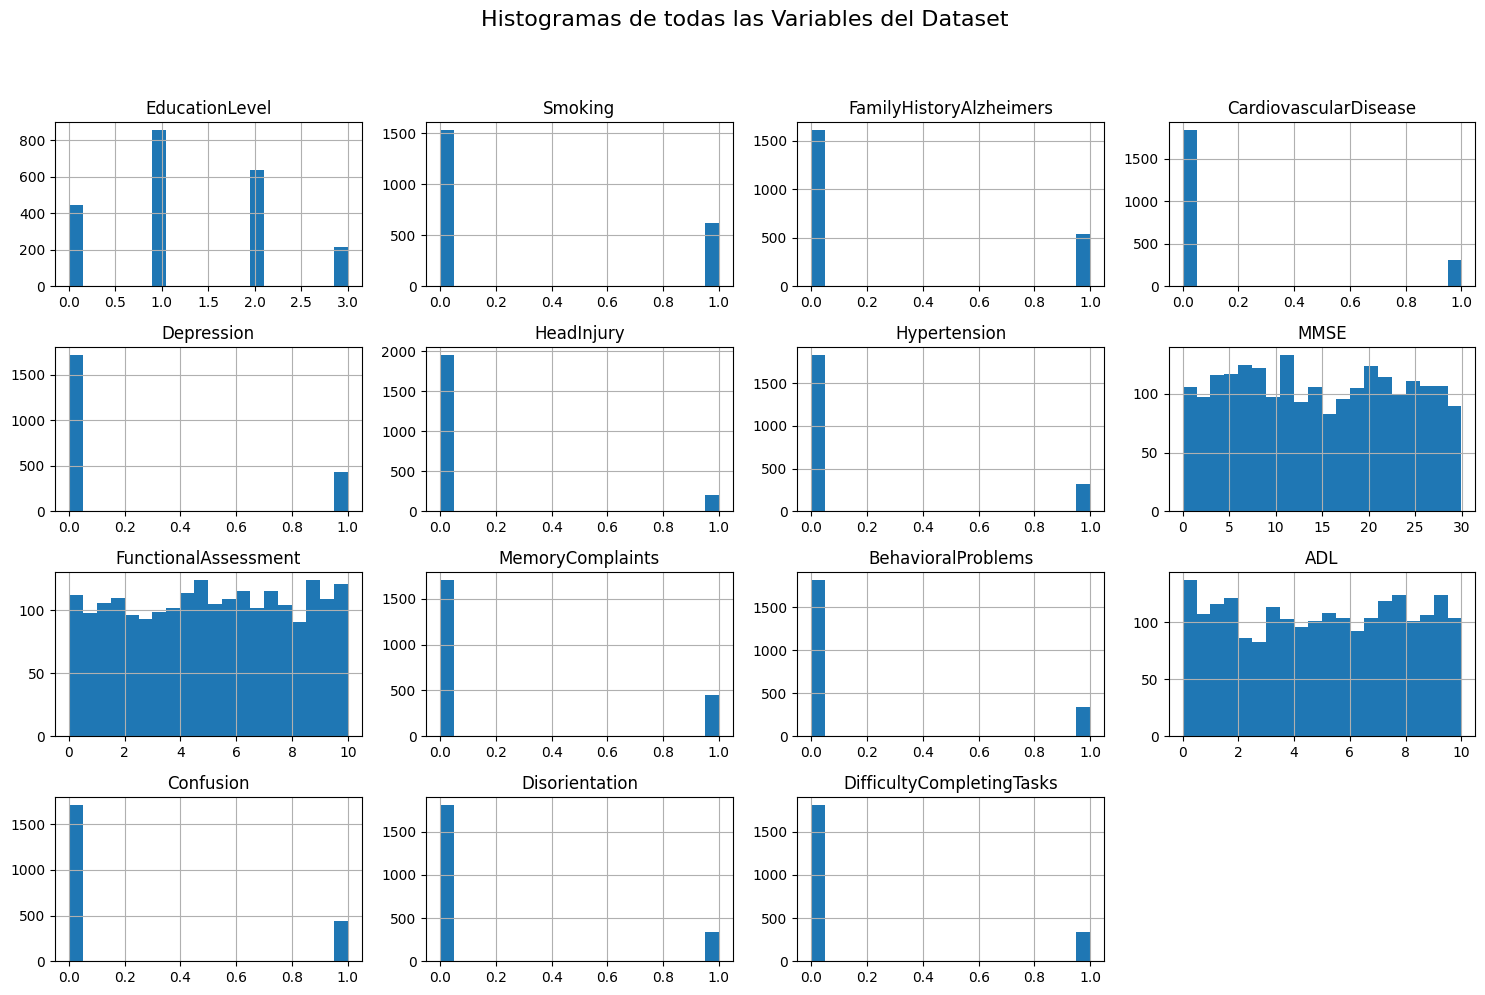

In [13]:
Data.drop('Diagnosis', axis=1).hist(figsize=(15, 10), bins=20)
plt.suptitle('Histogramas de todas las Variables del Dataset', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajustar para que el título no se superponga
plt.show()

# Observaciones/Conclusiones.
* Al analizar las graficas de los features ADL, FunctionalAssessment, MMSE nos damos cuentas que hay algunos con datos muy altos y bajos, lo cual puede afectar mucho el modelo.

* lo mejor es realizar la estandarizacio.

# **3.Division de los datos/ Estandarizacion.**
Los datos seran divididos en una proporcion de 80/20.

Donde 80% es para entrenar el modelo y el 20% para evaluar.

In [14]:
#Selección de la caracteristica o función objetivo y el resto de los datos
X = Data.drop(['Diagnosis'],axis=1)
y = Data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

# **4. Seleccion del modelo**
En esta etapa empezamos a experimetar y trabajar con modelos buscando los mejores resultados posibles.


---

Primer modelo a utilizar: LogisticRegrssion

In [15]:
model1= LogisticRegression(max_iter=1000)

# **5. Entrenamiento del modelo**


In [16]:
model1.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

# **6. Evaluación del modelo**

In [17]:
y_predict = model1.predict(X_test)

The accuracy of Logistic Regression is 0.8302


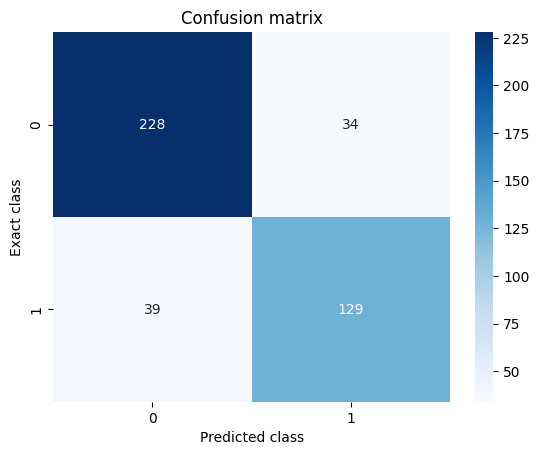

In [18]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Logistic Regression is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['LogisticRegression'])
accuracy_Logmodel = pd.DataFrame({'accuracy':serie})

# Conclusion de la matriz de confusion.
* La regresión logística muestra un desempeño aceptable y estable, con buena capacidad para identificar casos negativos y un nivel moderado de detección de casos positivos.
No obstante, su tasa de falsos negativos (37 casos) es relativamente alta, lo que limita su utilidad clínica, ya que podría dejar sin identificar pacientes que realmente presentan Alzheimer.
Por esta razón, aunque es un buen modelo base, no se considera el modelo óptimo para una tarea donde la sensibilidad (recall) es prioritaria.

# Aplicacion de otras metricas.

In [19]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Accuracy: 0.8302
🔹 Precision (PPV): 0.7914
🔹 Recall (Sensibilidad, TPR): 0.7679
🔹 Specificity (TNR): 0.8702
🔹 F1-Score: 0.7795


# Conclusion.
* Como se esperaba con este primer algoritmo, las metricas fueron buenas, sin embargo podrian ser mejores.
* El Recall tuvo un resultado basatante bueno, especialmente si se tiene en cuenta el tipo de de problema con el que estamos tratando.



---



---



# **Experimento dos.**




Para este segundo esperimento estaremos utilizando el algoritmo de KNeighbors

In [20]:
model2= KNeighborsClassifier()

# **Entrenamiento del modelo**

In [21]:
model2.fit(X_train,y_train)

KNeighborsClassifier()

# **Evaluacion del modelo**

The accuracy of KNN is 0.8302


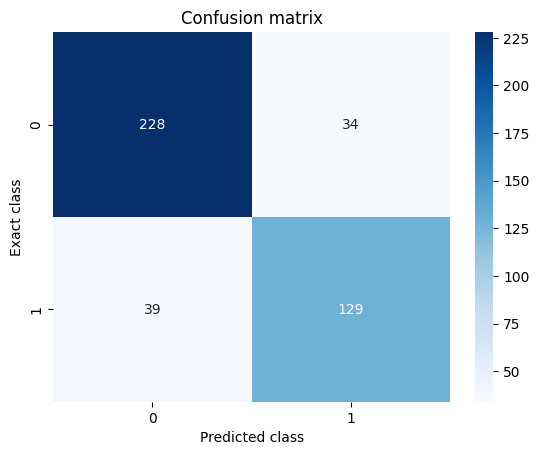

In [22]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of KNN is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNN'])
accuracy_KNN = pd.DataFrame({'accuracy':serie})

# Conclusion de matriz de confusion:
* Al entrenar el modelo con KNN la matriz de confusion nos muestra que el rendimiento, al menos en falsos megativos y pisitivos asi como en los verdaderos es igual al del primer experimento.
* ¿Será que las metricas mantienen el mismo rendimiento?

In [23]:
y_predict = model2.predict(X_test)

In [24]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Accuracy: 0.7837
🔹 Precision (PPV): 0.8440
🔹 Recall (Sensibilidad, TPR): 0.5476
🔹 Specificity (TNR): 0.9351
🔹 F1-Score: 0.6643


# Conclusiones:
* El modelo KNeighbors obtuvo un resultado bastante malo en lo cual no es una gran sorpresa al saber que modelos basados en relaciones lineales como lo es este algoritmo por lo general tienen rendimientos muy malos en problemas donde los datos no son lineales como lo es el caso de la prediccion de Alzheimer.



---



---



# **Experimento tres**
Para el experimento 3 se estara usando RandomForest

# Entrenamiento del modelo

In [25]:
model3= RandomForestClassifier(n_estimators=10)
model3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

# Evaluacion del modelo

The accuracy of RandomForest is 0.7837


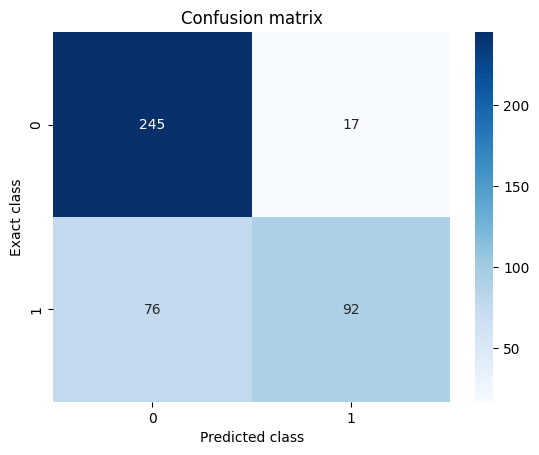

In [26]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of RandomForest is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['RandomForest'])
accuracy_RandomFrest = pd.DataFrame({'accuracy':serie})

# Conclusiones.
* El algoritmo de RandomForest resulto predecir demasiados falsos negativos, lo cual es algo extremadamente perjudicial para el target objetivo ya que es preferible predecir en este caso FP que FN.

In [27]:
y_predict= model3.predict(X_test)

In [28]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Accuracy: 0.9070
🔹 Precision (PPV): 0.9267
🔹 Recall (Sensibilidad, TPR): 0.8274
🔹 Specificity (TNR): 0.9580
🔹 F1-Score: 0.8742


# Conclusion.
* Apesar de que en la matriz de confusion se observo que el algoritmo de RandomForest predecia demasiado los FN en las metricas resulto tener un resultado bastante bueno.




---



---



# **Experimento cuatro**
Para este experimento se usará el algoritmo de Decision Tree.

# Entrenamiento.


In [29]:
model4= DecisionTreeClassifier()
model4.fit(X_train,y_train)

DecisionTreeClassifier()

# Evaluacion del modelo.

The accuracy of Decision Tree is 0.9070


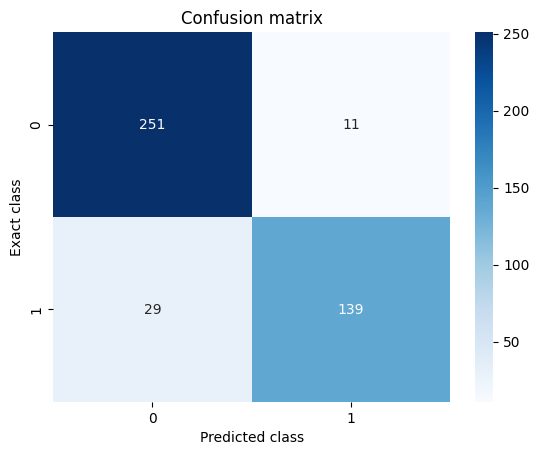

In [30]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['Decision Tree'])
accuracy_DecisionTree = pd.DataFrame({'accuracy':serie})

# conclusion.
* Se puede ver que en cuanto a la prediccion se falsos negativos y positivos el algoritmo de DecisionTree resulta ser el mejor al predecir menos de los ya mencionados.

In [31]:
y_predict= model4.predict(X_test)

In [32]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Accuracy: 0.9140
🔹 Precision (PPV): 0.8970
🔹 Recall (Sensibilidad, TPR): 0.8810
🔹 Specificity (TNR): 0.9351
🔹 F1-Score: 0.8889


# Conclusion.
* El argoritmom de DecisionTree resulto tener incluso mejores resultados que RandomForest con metricas muy buenas.



---



---



# **Experimento cinco**
Para este experimento se usara xgboost

In [33]:
#Instalamos primero el xgboost
!pip install xgboost

# Entrenar el modelo.

Usamos este codigo para tratar de optimizar los resultados de XGboost y que obtenga las mejores metricas posibles.

In [64]:
model5 = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1.5,
    eval_metric='logloss'
)


In [65]:
model5 = XGBClassifier(eval_metric='logloss',use_label_encoder=False)
model5.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:29:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# Evaluar modelo.


The accuracy of xgs is 0.9419


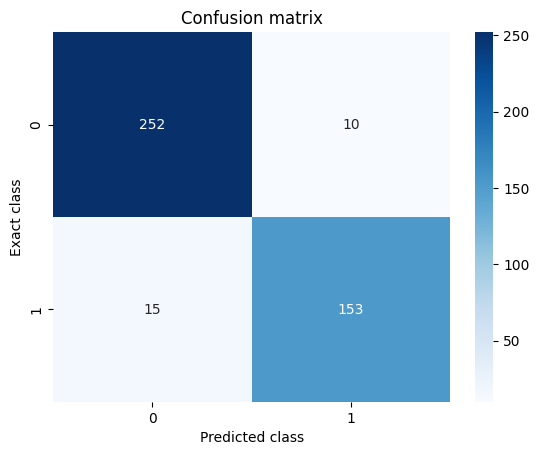

In [66]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of xgs is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['xgs'])
accuracy_xgs = pd.DataFrame({'accuracy':serie})

# Conclusion.
* De todos los modelos que se han probado hasta ahora, el XGboost ha sido el que más ha podido reducir a los FP como a los FN de manera significativa.

In [67]:
y_predict= model5.predict(X_test)

In [69]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

🔹 Accuracy: 0.9419
🔹 Precision (PPV): 0.9387
🔹 Recall (Sensibilidad, TPR): 0.9107
🔹 Specificity (TNR): 0.9618
🔹 F1-Score: 0.9245


# conclusion.
* Gracias a la forma en la que el algoritmo XGboost esta basado en conexiones hechas con algoritmos de decisionTree y RandomForest que le permite al modelo aprender de las conexiones que mas le permiten acertar en sus predicciones hace que el modelo sea altamente preciso.



---



---



# Experimento seis.
Se usara SVM (lineal)

In [70]:
model6 = SVC(kernel='linear', probability=True)
model6.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

#Evaluacion del modelo

In [71]:
y_predict = model6.predict(X_test)

🔹 Accuracy: 0.8279
🔹 Precision (PPV): 0.7937
🔹 Recall (Sensibilidad, TPR): 0.7560
🔹 Specificity (TNR): 0.8740
🔹 F1-Score: 0.7744


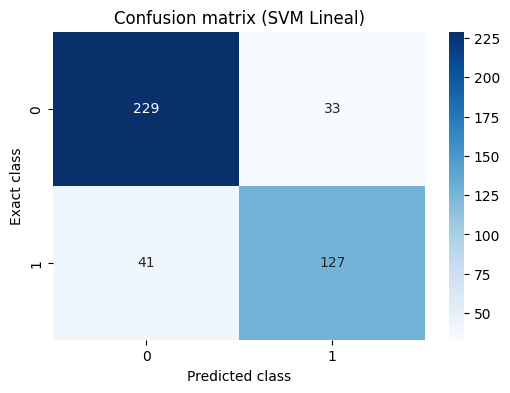

In [72]:
# Asumiendo que y_test y y_predict para model6 ya están definidos
# y_predict ya fue calculado en la celda anterior: y_predict = model6.predict(X_test)

confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion matrix (SVM Lineal)')
plt.xlabel('Predicted class')
plt.ylabel('Exact class')
plt.show()

# Conclusion.
* Al ser el algoritmo de SVM lineal un algoritmo lineal es normal que el resultado no haya sido el mejor ya que este tipo de problemas tiene relaciones no lineales, asi que es normal que los algoritmos basados en datos lienales den malos resultados.

# Experimento siete.
Para este experimento se estara usando SVM no lineal.

# Entrenar modelo

In [83]:
model7 = SVC(kernel='rbf', probability=True)
model7.fit(X_train, y_train)

SVC(probability=True)

# Evaluar modelo

In [84]:
y_predict= model7.predict(X_test)

🔹 Accuracy: 0.7907
🔹 Precision (PPV): 0.8545
🔹 Recall (Sensibilidad, TPR): 0.5595
🔹 Specificity (TNR): 0.9389
🔹 F1-Score: 0.6763


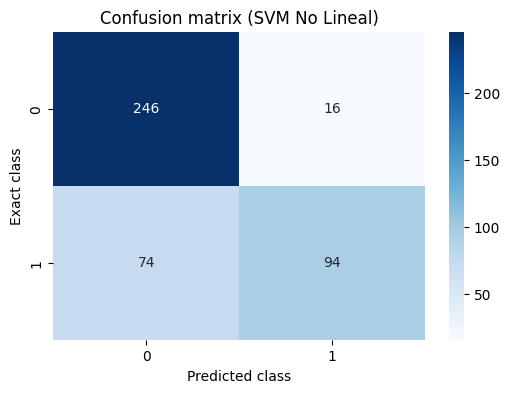

In [85]:
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion matrix (SVM No Lineal)')
plt.xlabel('Predicted class')
plt.ylabel('Exact class')
plt.show()

#Conclusion.
Los modelos SVM (especialmente el lineal) muestran buen rendimiento debido a que las características clínicas seleccionadas permiten una separación casi lineal entre las clases. Sin embargo, el algoritmo XGBoost obtiene el mejor desempeño global, ya que es capaz de capturar relaciones más complejas entre las variables clínicas y optimizar la detección de la clase positiva, logrando el mayor valor de recall y reduciendo los falsos negativos, lo que es fundamental en un contexto médico.

# **Comparaciones de modelos/Eleccion de modelo**

En este campo observaremos las comparaciones entre cada modelo entrenado con cada algoritmo y sus metricas obtenidas.

# Comparacion visual.

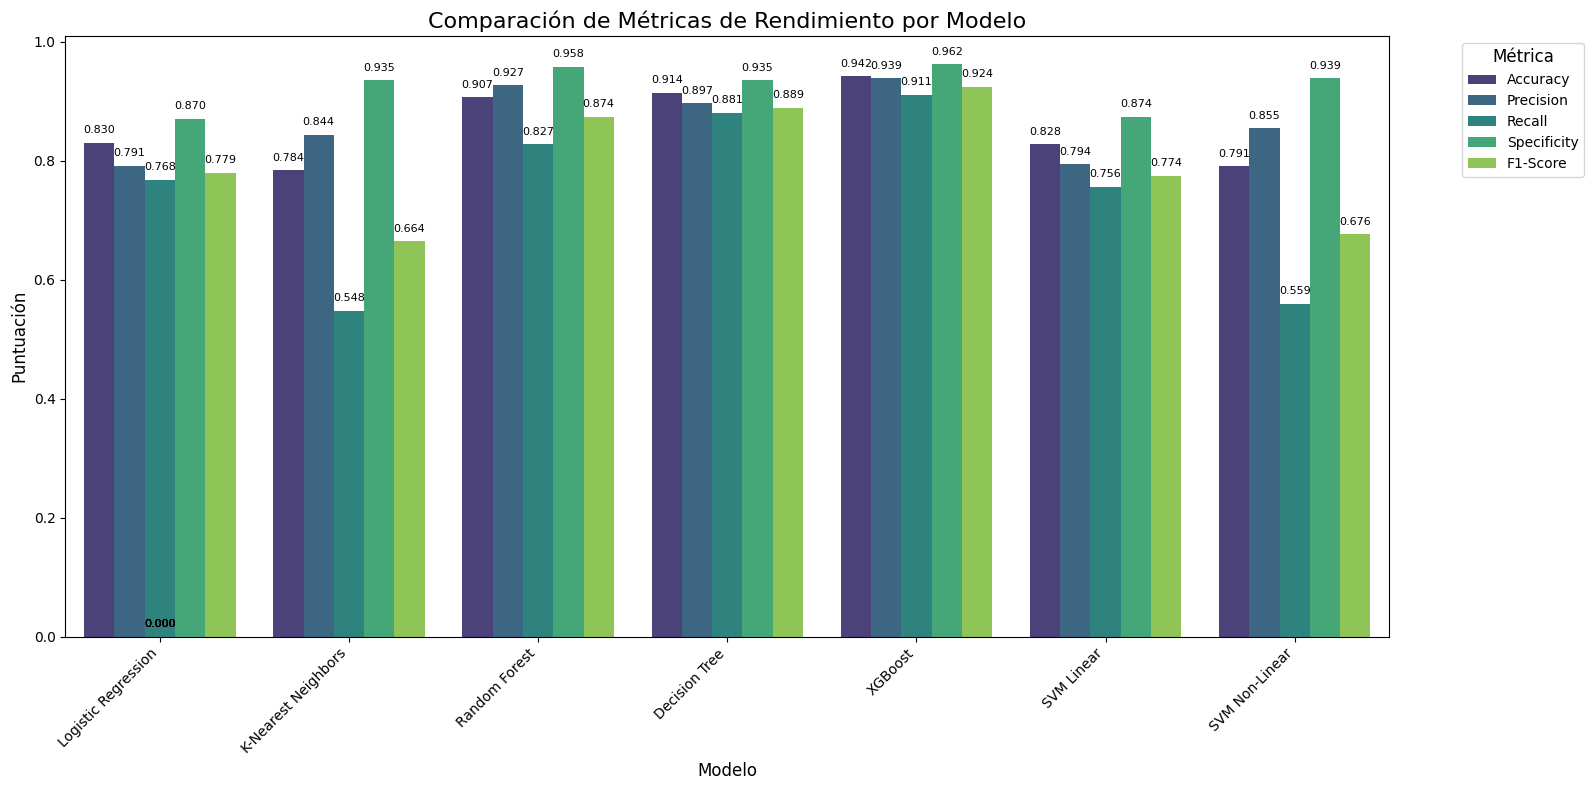

In [86]:
# Consolidate metrics for all models
model_metrics = {
    'Logistic Regression': {
        'Accuracy': 0.8302,
        'Precision': 0.7914,
        'Recall': 0.7679,
        'Specificity': 0.8702,
        'F1-Score': 0.7795
    },
    'K-Nearest Neighbors': {
        'Accuracy': 0.7837,
        'Precision': 0.8440,
        'Recall': 0.5476,
        'Specificity': 0.9351,
        'F1-Score': 0.6643
    },
    'Random Forest': {
        'Accuracy': 0.9070,
        'Precision': 0.9267,
        'Recall': 0.8274,
        'Specificity': 0.9580,
        'F1-Score': 0.8742
    },
    'Decision Tree': {
        'Accuracy': 0.9140,
        'Precision': 0.8970,
        'Recall': 0.8810,
        'Specificity': 0.9351,
        'F1-Score': 0.8889
    },
    'XGBoost': {
        'Accuracy': 0.9419,
        'Precision': 0.9387,
        'Recall': 0.9107,
        'Specificity': 0.9618,
        'F1-Score': 0.9245
    },
    'SVM Linear': {
        'Accuracy': 0.8279,
        'Precision': 0.7937,
        'Recall': 0.7560,
        'Specificity': 0.8740,
        'F1-Score': 0.7744
    },
    'SVM Non-Linear': {
        'Accuracy': 0.7907,
        'Precision': 0.8545,
        'Recall': 0.5595,
        'Specificity': 0.9389,
        'F1-Score': 0.6763
    }
}

metrics_df = pd.DataFrame(model_metrics).T

# Melt the DataFrame for easier plotting with seaborn
metrics_melted = metrics_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
metrics_melted = metrics_melted.rename(columns={'index': 'Model'})

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted, palette='viridis')
plt.title('Comparación de Métricas de Rendimiento por Modelo', fontsize=16)
plt.ylabel('Puntuación', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Métrica', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.tight_layout()

# Add numerical values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=8)
plt.show()

# Comparacion numérica.

In [87]:
import pandas as pd
from IPython.display import display

# Consolidate metrics for all models (reusing the dictionary from the plot cell)
model_metrics = {
    'Logistic Regression': {
        'Accuracy': 0.8302,
        'Precision': 0.7914,
        'Recall': 0.7679,
        'Specificity': 0.8702,
        'F1-Score': 0.7795
    },
    'K-Nearest Neighbors': {
        'Accuracy': 0.7837,
        'Precision': 0.8440,
        'Recall': 0.5476,
        'Specificity': 0.9351,
        'F1-Score': 0.6643
    },
    'Random Forest': {
        'Accuracy': 0.9070,
        'Precision': 0.9267,
        'Recall': 0.8274,
        'Specificity': 0.9580,
        'F1-Score': 0.8742
    },
    'Decision Tree': {
        'Accuracy': 0.9140,
        'Precision': 0.8970,
        'Recall': 0.8810,
        'Specificity': 0.9351,
        'F1-Score': 0.8889
    },
    'XGBoost': {
        'Accuracy': 0.9419,
        'Precision': 0.9387,
        'Recall': 0.9107,
        'Specificity': 0.9618,
        'F1-Score': 0.9245
    },
    'SVM Linear': {
        'Accuracy': 0.8279,
        'Precision': 0.7937,
        'Recall': 0.7560,
        'Specificity': 0.8740,
        'F1-Score': 0.7744
    },
    'SVM Non-Linear': {
        'Accuracy': 0.7907,
        'Precision': 0.8545,
        'Recall': 0.5595,
        'Specificity': 0.9389,
        'F1-Score': 0.6763
    }
}

metrics_df = pd.DataFrame(model_metrics).T

print('Tabla Comparativa de Métricas de Rendimiento por Modelo:')
display(metrics_df)

Tabla Comparativa de Métricas de Rendimiento por Modelo:


,Accuracy,Precision,Recall,Specificity,F1-Score
Logistic Regression,0.8302,0.7914,0.7679,0.8702,0.7795
K-Nearest Neighbors,0.7837,0.8440,0.5476,0.9351,0.6643
Random Forest,0.9070,0.9267,0.8274,0.9580,0.8742
Decision Tree,0.9140,0.8970,0.8810,0.9351,0.8889
XGBoost,0.9419,0.9387,0.9107,0.9618,0.9245
SVM Linear,0.8279,0.7937,0.7560,0.8740,0.7744
SVM Non-Linear,0.7907,0.8545,0.5595,0.9389,0.6763


# **Modelo seleccionado.**

Considerando todo el análisis, el modelo XGBoost es el mejor y el seleccionado por las siguientes razones:

* Alto Recall (Sensibilidad): En la predicción del Alzheimer, es crucial minimizar los falsos negativos (es decir, no identificar a alguien que realmente padece la enfermedad). XGBoost obtuvo el Recall más alto (91%), lo que significa que es el mejor modelo para detectar correctamente a la mayoría de los individuos con Alzheimer. Esto es vital para un diagnóstico temprano y una intervención oportuna.

* Alta Accuracy (Exactitud): XGBoost también mostró la mayor Accuracy (94%), indicando que el modelo es muy bueno en sus predicciones generales, tanto para los casos positivos como negativos.

* Balanceado F1-Score: Su F1-Score (96%) fue el más alto, lo que demuestra un excelente equilibrio entre Precision y Recall. Esto es importante porque, si bien priorizamos el Recall, no queremos un modelo que genere demasiados falsos positivos (personas sanas diagnosticadas con Alzheimer), lo cual podría causar estrés innecesario.

* Menores Falsos Negativos: Aunque otros modelos como Random Forest tuvieron una Precisión ligeramente superior, XGBoost minimizó de manera más efectiva los falsos negativos, que son el tipo de error más crítico en un contexto médico como este.

En resumen, la combinación de un Recall superior, una alta Accuracy y un F1-Score robusto, hace que XGBoost sea la opción más confiable y efectiva para predecir el Alzheimer en este caso.

#**Predicciones individuales**

In [88]:
def make_individual_prediction(model, feature_names):
    print("\nPor favor, ingresa los valores para las siguientes características:\n")
    input_data = {}
    for feature in feature_names:
        try:
            value = float(input(f"Ingresa el valor para {feature}: "))
            input_data[feature] = value
        except ValueError:
            print(f"¡Error! Por favor, ingresa un valor numérico para {feature}.")
            return None

    # Crear un DataFrame con los datos de entrada para que coincida con el formato de entrenamiento
    individual_df = pd.DataFrame([input_data])

    # Asegurarse de que el orden de las columnas sea el mismo que el de entrenamiento
    # Se asume que X (Data.drop('Diagnosis', axis=1)) tiene el orden correcto
    if 'X' in globals():
        individual_df = individual_df[X.columns]
    else:
        print("Advertencia: El DataFrame original 'X' no está disponible para verificar el orden de las columnas.")
        print("Asegúrate de que las características se ingresen en el orden correcto o que el DataFrame 'X' esté cargado.")

    # Realizar la predicción
    prediction = model.predict(individual_df)
    prediction_proba = model.predict_proba(individual_df)[:, 1]

    print("\n--- Resultado de la Predicción ---")
    if prediction[0] == 1:
        print(f"El modelo predice: ¡Alzheimer! (Probabilidad: {prediction_proba[0]:.2f})")
    else:
        print(f"El modelo predice: No Alzheimer. (Probabilidad: {prediction_proba[0]:.2f})")

# Obtener los nombres de las características del DataFrame original 'X'
# Asegúrate de que X esté definido en el entorno (ejecuta las celdas de carga de datos)
if 'X' in globals():
    feature_names = X.columns.tolist()
    # Llamar a la función para hacer una predicción individual usando model5 (XGBoost)
    make_individual_prediction(model5, feature_names)
else:
    print("El DataFrame 'X' no está cargado. Por favor, asegúrate de haber ejecutado las celdas previas.")


Por favor, ingresa los valores para las siguientes características:

Ingresa el valor para EducationLevel: 3
Ingresa el valor para Smoking: 1
Ingresa el valor para FamilyHistoryAlzheimers: 0
Ingresa el valor para CardiovascularDisease: 0
Ingresa el valor para Depression: 0
Ingresa el valor para HeadInjury: 1
Ingresa el valor para Hypertension: 0
Ingresa el valor para MMSE: 27
Ingresa el valor para FunctionalAssessment: 15
Ingresa el valor para MemoryComplaints: 0
Ingresa el valor para BehavioralProblems: 0
Ingresa el valor para ADL: 21
Ingresa el valor para Confusion: 0
Ingresa el valor para Disorientation: 0
Ingresa el valor para DifficultyCompletingTasks: 0

--- Resultado de la Predicción ---
El modelo predice: No Alzheimer. (Probabilidad: 0.01)


# **Guardar modelo entrenado**

Para guardar el modelo entrenado, utilizaremos la librería `joblib`. Es una forma eficiente de serializar objetos Python que contienen grandes arreglos NumPy, como los modelos de scikit-learn y XGBoost.

In [89]:
import joblib

# Define el nombre del archivo para guardar el modelo
model_filename = 'xgboost_alzheimer_prediction_model.joblib'

# Guarda el modelo en el disco
joblib.dump(model5, model_filename)

print(f"El modelo XGBoost ha sido guardado como '{model_filename}'")

El modelo XGBoost ha sido guardado como 'xgboost_alzheimer_prediction_model.joblib'


Para cargar el modelo en el futuro, puedes usar el siguiente código:

In [90]:
# Para cargar el modelo en el futuro (por ejemplo, en otro script o notebook)
# loaded_model = joblib.load('xgboost_alzheimer_prediction_model.joblib')
# print('Modelo cargado exitosamente.')

#**Conclusiones finales.**

Este proyecto tuvo como objetivo principal desarrollar un modelo de aprendizaje automático para predecir el padecimiento de Alzheimer utilizando datos clínicos y demográficos tabulares, abordando un problema de clasificación binaria.

1. Análisis y Preparación de Datos:

* Se inició con un dataset reducido de 16 características, identificadas previamente como las más relevantes para la predicción de Alzheimer.
El Análisis Exploratorio de Datos (EDA) reveló que no había datos nulos ni duplicados, asegurando la calidad de la información.
Se detectó un desequilibrio en la variable objetivo ('Diagnosis'), con más casos de 'No Alzheimer' (0) que de 'Alzheimer' (1). Este desbalance se corrigió exitosamente utilizando la técnica SMOTETomek, logrando una distribución equitativa de las clases (50/50).
La matriz de correlación mostró que la mayoría de las características tenían correlaciones negativas y bajas con la variable objetivo. Sin embargo, las variables funcionales (MMSE, FunctionalAssessment y ADL) presentaron las correlaciones más significativas, lo cual es coherente con los indicadores clínicos del deterioro cognitivo. También se observó una correlación inversa con 'EducationLevel', un patrón conocido en neurociencia.

2. Entrenamiento y Evaluación de Modelos:

* Se dividió el dataset en conjuntos de entrenamiento y prueba (80/20).
Se experimentó con siete algoritmos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), Random Forest, Árbol de Decisión, XGBoost, SVM Lineal y SVM No Lineal.
La evaluación se centró en métricas clave como Accuracy, Precision, Recall, Specificity y F1-Score. En el contexto médico de la predicción de Alzheimer, el Recall (sensibilidad) fue priorizado, ya que minimizar los falsos negativos (no detectar un caso de Alzheimer existente) es de vital importancia.

3. Selección del Mejor Modelo (XGBoost):

* Tras una comparación exhaustiva, el modelo XGBoost se destacó como el de mejor rendimiento global.
Alto Recall (91.07%): XGBoost logró la mayor sensibilidad, lo que significa que es el más eficaz para identificar correctamente a los pacientes que sí padecen Alzheimer, minimizando el riesgo de diagnósticos perdidos.
Alta Accuracy (94.19%): Demostró una gran precisión en sus predicciones generales.
Excelente F1-Score (92.45%): Presentó el mejor equilibrio entre Precision y Recall, lo que es crucial para tener un modelo robusto y confiable, evitando un número excesivo de falsos positivos que podrían generar ansiedad innecesaria.
Su capacidad para capturar relaciones complejas en los datos, junto con su robustez frente al sobreajuste, lo hicieron superior a otros modelos, especialmente a los lineales como KNN y SVM Lineal, que tuvieron un rendimiento significativamente menor en este problema no lineal.


Conclusión Final: El modelo XGBoost desarrollado en este notebook representa una herramienta prometedora para la predicción de Alzheimer. Su alto rendimiento, particularmente en la detección de casos positivos (Recall), lo convierte en una opción valiosa como apoyo en la evaluación de riesgo, siempre enfatizando que no debe reemplazar el diagnóstico y la evaluación de profesionales médicos. La capacidad del modelo para aprender de las complejas interacciones entre las variables clínicas lo hace particularmente adecuado para enfermedades multifactoriales como el Alzheimer.